What makes the ability to Enumeration?  
`IEnumerable` and `IEnumerator`, and their generic counterparts

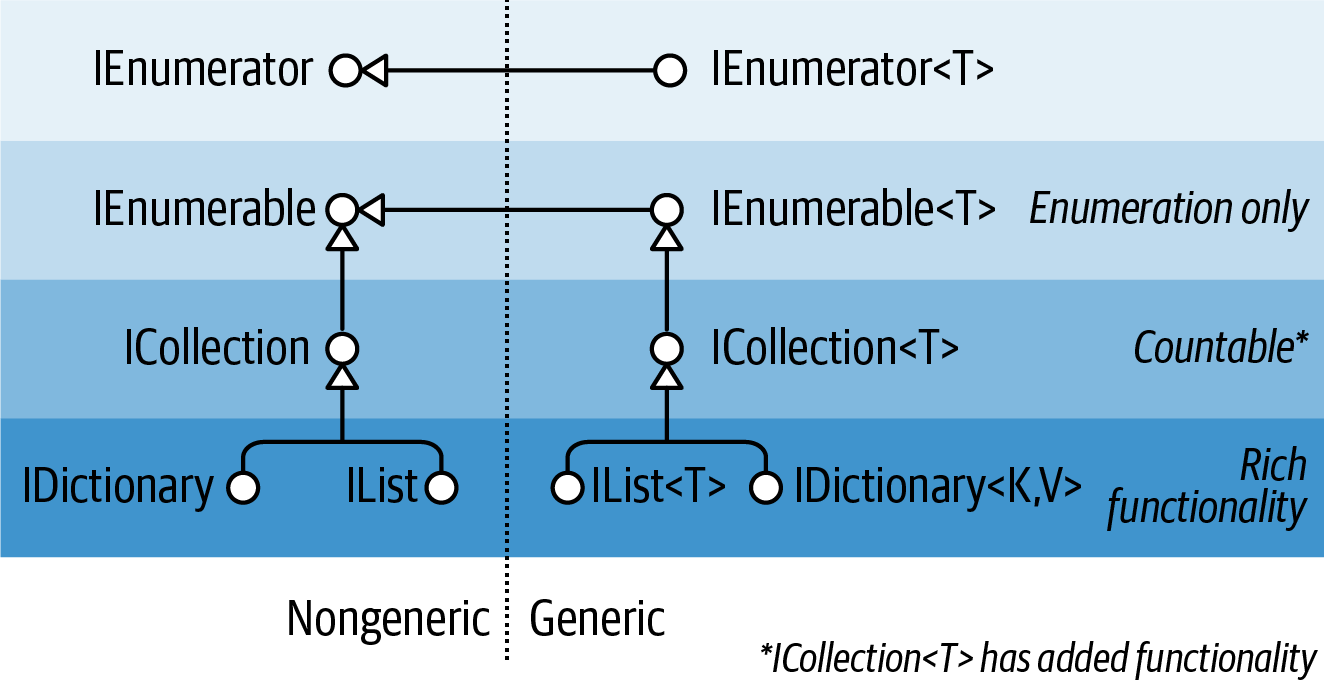

In [ ]:
public interface IEnumerator
{
    bool MoveNext();
    object Current { get; }
    void Reset();
}

<div dir="rtl" style="width:90%; margin:auto; font-family:vazirmatn;">
<h4><code>IEnumerator</code> Interface</h4>
<p>اینترفیس <code>IEnumerator</code> پروتکل پایه‌ای را تعریف می‌کند که به وسیله آن عناصر یک مجموعه به صورت پیاپی پیمایش یا "enumerated" می‌شوند. اینترفیس <code>IEnumerator</code> به این شکل تعریف شده است:</p>

<h5>اعضای <code>IEnumerator</code>:</h5>
<ul><li><strong>MoveNext</strong>: این متد مکان فعلی یا "cursor" را به عنصر بعدی در مجموعه انتقال می‌دهد. اگر عناصر بیشتری در مجموعه وجود نداشته باشد، مقدار <code>false</code> را بازمی‌گرداند.</li><li><strong>Current</strong>: این پراپرتی عنصر فعلی در مکان کنونی را بازمی‌گرداند. این عنصر معمولاً به نوع خاص‌تری تبدیل می‌شود (از <code>object</code> به نوع خاص‌تر).</li><li><strong>Reset</strong>: اگر پیاده‌سازی شده باشد، این متد مکان فعلی را به ابتدای مجموعه بازمی‌گرداند، که اجازه می‌دهد مجموعه دوباره پیمایش شود. این متد عمدتاً برای سازگاری با Component Object Model (COM) وجود دارد و استفاده مستقیم از آن معمولاً به دلیل عدم پشتیبانی جهانی و عدم نیاز، اجتناب می‌شود.</li></ul>
</div>

In [ ]:
public interface IEnumerable
{
    IEnumerator GetEnumerator();
}

<div dir="rtl" style="width:90%; margin:auto; font-family:vazirmatn;">
<h4><code>IEnumerable</code> Interface</h4>
<p>مجموعه‌ها به طور معمول خودشان پیاده‌سازی‌کنندهٔ enumeratorها نیستند؛ بلکه این قابلیت را از طریق اینترفیس <code>IEnumerable</code> فراهم می‌کنند:</p>

<ul><li>با تعریف یک متد که یک enumerator را بازمی‌گرداند، <code>IEnumerable</code> انعطاف‌پذیری ایجاد می‌کند که اجازه می‌دهد منطق پیمایش به کلاس دیگری واگذار شود. همچنین، این به این معنا است که چندین مصرف‌کننده می‌توانند مجموعه را به طور همزمان پیمایش کنند بدون اینکه به یکدیگر تداخل کنند.</li><li>می‌توان به <code>IEnumerable</code> به عنوان "تامین‌کنندهٔ IEnumerator" نگاه کرد و این پایه‌ترین اینترفیسی است که کلاس‌های مجموعه پیاده‌سازی می‌کنند.</li></ul>
</div>

In [1]:
public class Address : IEnumerable
{
    public string City { get; set; } = string.Empty;
    public string State { get; set; } = string.Empty;
    public string PostalCode { get; set; } = string.Empty;

    public IEnumerator GetEnumerator()
    {
        yield return City;
        yield return State;
        yield return PostalCode;
    }
}

var address = new Address { City = "kerman", State = "kerman", PostalCode = "123456" };
foreach (var item in address)
    Console.WriteLine(item);



kerman
kerman
123456


`foreach` is actually equivalent to the code below

In [ ]:
IEnumerator rator = address.GetEnumerator();

while (rator.MoveNext())
{
    string str = (string) rator.Current;
    Console.WriteLine(str);
}

### `IEnumerable<T>` and `IEnumerator<T>`

In [ ]:
//Generic version

public interface IEnumerator<T> : IEnumerator, IDisposable
{
    T Current { get; }
}
public interface IEnumerable<T> : IEnumerable
{
    IEnumerator<T> GetEnumerator();
}

In [ ]:
public class AddressGeneric : IEnumerable<string>
{
    public string City { get; set; } = string.Empty;
    public string State { get; set; } = string.Empty;
    public string PostalCode { get; set; } = string.Empty;

    // پیاده‌سازی جنریک GetEnumerator که IEnumerator<string> برمی‌گرداند
    public IEnumerator<string> GetEnumerator()
    {
        yield return City;
        yield return State;
        yield return PostalCode;
    }

    // پیاده‌سازی غیرجنریک IEnumerable.GetEnumerator
    // این متد فقط برای سازگاری با IEnumerable است.
    IEnumerator IEnumerable.GetEnumerator()
    {
        // اینجا می‌توانید به سادگی متد جنریک GetEnumerator را فراخوانی کنید
        return this.GetEnumerator();
    }
}

<div dir="rtl" style="width:90%; margin:auto; font-family:vazirmatn;">
<p><strong>ارث‌بری <code>IEnumerator&lt;T&gt;</code> از <code>IDisposable</code></strong>:
</p>

<ul><li><code>IEnumerator&lt;T&gt;</code> اینترفیس <code>IDisposable</code> را پیاده‌سازی می‌کند. این باعث می‌شود که متد <code>Dispose</code> برای آزادسازی منابع استفاده شود.</li><li>این ویژگی برای مواقعی که enumeratorها به منابعی مانند اتصالات به پایگاه داده‌ها یا فایل‌ها دسترسی دارند، بسیار مفید است.</li></ul>

<p><strong>پیمایش امن منابع با استفاده از <code>foreach</code></strong>:</p>
<ul><li>وقتی از حلقه <code>foreach</code> استفاده می‌کنید، کد شما به طور خودکار منابع را مدیریت می‌کند. این حلقه در پشت صحنه به شکلی معادل با استفاده از دستور <code>using</code> عمل می‌کند.</li><li>کد معادل حلقه <code>foreach</code> به صورت زیر است:</li></ul>
</div>

In [ ]:
using (var rator = somethingEnumerable.GetEnumerator())
{
    while (rator.MoveNext())
    {
        var element = rator.Current;
        // عملیات مورد نظر روی element
    }
}

### Implementing the Enumeration Interfaces

<div dir="rtl" style="width:90%; margin:auto; font-family:vazirmatn;">
دلایلی که ممکن است شما بخواهید <code>IEnumerable</code> یا <code>IEnumerable&lt;T&gt;</code> را پیاده سازی کنید

<h5>1. پشتیبانی از دستور <code>foreach</code></h5>
<ul><li><strong>پیمایش ساده</strong>: پیاده‌سازی <code>IEnumerable</code> یا <code>IEnumerable&lt;T&gt;</code> به شما اجازه می‌دهد که از حلقه <code>foreach</code> برای پیمایش مجموعه‌های خود استفاده کنید. این باعث می‌شود که کد شما خواناتر و ساده‌تر شود.</li></ul>

<h5>2. همکاری با هر چیزی که یک مجموعه استاندارد انتظار دارد</h5>
<ul><li><strong>هماهنگی با APIها و کتابخانه‌های موجود</strong>: پیاده‌سازی این اینترفیس‌ها به کلاس شما اجازه می‌دهد که با APIها و کتابخانه‌هایی که انتظار مجموعه‌های استاندارد را دارند، به راحتی کار کند. به عنوان مثال، بسیاری از متدهای LINQ بر اساس اینترفیس‌های <code>IEnumerable</code> و <code>IEnumerable&lt;T&gt;</code> کار می‌کنند.</li></ul>

<h5>3. برآورده کردن نیازهای یک اینترفیس مجموعه پیچیده‌تر</h5>

<ul><li><strong>پیچیدگی‌های بیشتر</strong>: ممکن است شما نیاز داشته باشید که یک اینترفیس پیچیده‌تر مانند <code>ICollection&lt;T&gt;</code> یا <code>IList&lt;T&gt;</code> را پیاده‌سازی کنید. این اینترفیس‌ها از <code>IEnumerable&lt;T&gt;</code> ارث‌بری می‌کنند، بنابراین پیاده‌سازی <code>IEnumerable&lt;T&gt;</code> برای برآورده کردن نیازهای آنها ضروری است.</li></ul>

<h5>4. پشتیبانی از initializers مجموعه</h5>
<ul><li><strong>initializers مجموعه</strong>: پیاده‌سازی این اینترفیس‌ها به شما اجازه می‌دهد که از initializers مجموعه در کد خود استفاده کنید. این ویژگی به شما اجازه می‌دهد که مجموعه‌ها را به شکلی ساده و مختصر مقداردهی اولیه کنید.</li></ul>


</div>

In [ ]:
public class MyCollection : IEnumerable<int>
{
    private List<int> _items = new List<int>();

    public void Add(int item)
    {
        _items.Add(item);
    }

    public IEnumerator<int> GetEnumerator()
    {
        return _items.GetEnumerator();
    }

    IEnumerator IEnumerable.GetEnumerator()
    {
        return GetEnumerator();
    }
}

// استفاده از initializer مجموعه
var collection = new MyCollection { 1, 2, 3 };
foreach (var item in collection)
{
    Console.WriteLine(item);
}

There are three way to implement `IEnumerable`/`IEnumerable<T>`  

- returning the` wrapped collection’s enumerator`

In [ ]:
public class MyCollection : IEnumerable<int>
{
    private List<int> _innerList = new List<int> { 1, 2, 3, 4, 5 };

    public IEnumerator<int> GetEnumerator()
    {
        return _innerList.GetEnumerator();
    }

    IEnumerator IEnumerable.GetEnumerator()
    {
        return GetEnumerator();
    }
}

- Via an iterator using `yield` return

In [ ]:
public class MyNumbers : IEnumerable<int>
{
    public IEnumerator<int> GetEnumerator()
    {
        for (int i = 0; i < 5; i++)
        {
            yield return i;
        }
    }

    IEnumerator IEnumerable.GetEnumerator()
    {
        return GetEnumerator();
    }
}

- By instantiating your ***own*** `IEnumerator`/`IEnumerator<T>` implementation

In [ ]:
public class MyCustomCollection : IEnumerable<int>
{
    private int[] _items = { 1, 2, 3, 4, 5 };

    public IEnumerator<int> GetEnumerator()
    {
        return new CustomEnumerator(_items);
    }

    IEnumerator IEnumerable.GetEnumerator()
    {
        return GetEnumerator();
    }

    private class CustomEnumerator : IEnumerator<int>
    {
        private int[] _items;
        private int _position = -1;

        public CustomEnumerator(int[] items)
        {
            _items = items;
        }

        public int Current
        {
            get
            {
                return _items[_position];
            }
        }

        object IEnumerator.Current => Current;

        public void Dispose() { }

        public bool MoveNext()
        {
            _position++;
            return (_position < _items.Length);
        }

        public void Reset()
        {
            _position = -1;
        }
    }
}